<a href="https://colab.research.google.com/github/divyajainsurana/LSV/blob/master/IoT_Assignment_4_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Create Dataset

### 1-1. Load pokemon dataset
Please upload the pokemon dataset.

dataset link: https://drive.google.com/open?id=1Kzw5W5XULWD0SEQs73t3kqyshpguZb2O

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [0]:
# read csv file with Python pandas package
import io
import pandas as pd
df_pokemon = pd.read_csv(io.StringIO(uploaded['Pokemon.csv'].decode('utf-8')))

### 1-2. Show data table

In [3]:
# show data samples
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# filter pokemon type not in 'Water' and 'Fire'
df_pokemon = df_pokemon[(df_pokemon['Type 1'] == 'Water') | (df_pokemon['Type 1'] == 'Fire')]

# show data samples
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


### 1-3 Assign the features and targets to separate variables.

In [0]:
# consider two features only: 'Defense', 'Attack'
x = df_pokemon[['Defense', 'Attack']].values

# data target 
y = df_pokemon['Type 1'].values

# change target to numeric ('Water' -> 0, 'Fire' -> 1)
y = [0 if type == 'Water' else 1 for type in y]

for visualization (you can skip)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


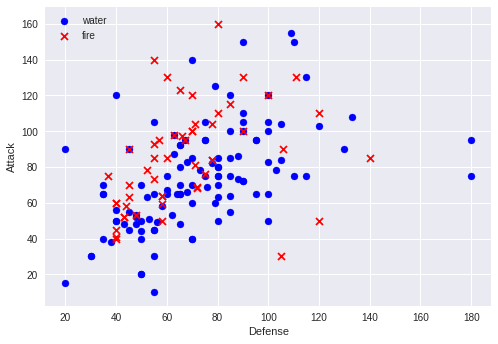

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

markers = ('o', 'x')
colors = ('blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], c=cmap(idx), marker=markers[idx], label='water' if cl == 0 else 'fire')

plt.xlabel('Defense')
plt.ylabel('Attack')
plt.legend(loc='upper left')

### 1-4 Splitting the dataset

In [0]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## 2.Build the model

In [0]:
# Decision Tree Classifier
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(max_depth=5)- 60%
from sklearn.svm import SVC
#SVC(gamma=2, C=1)
classifier = SVC(kernel="linear", C=0.025)
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(5) 
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#classifier=GaussianProcessClassifier(1.0 * RBF(1.0))
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#classifier=RandomForestClassifier(max_depth=15, n_estimators=15, max_features=1)
#classifier=AdaBoostClassifier()
#from sklearn.naive_bayes import GaussianNB
#classifier=GaussianNB() 
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#classifier=QuadraticDiscriminantAnalysis()


## 3. Train the Model

In [9]:
# Train the model
from sklearn import preprocessing
import numpy as np
#X_scaled = preprocessing.scale(x_train)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(x_train)
classifier.fit(X_train_trans, y_train)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## 4. Make predictions

In [0]:
# check prediction of first five test data
#print ('final prediction of samples: {}'.format( predictions[:5] ))  

## 5. Evaluate your results

In [11]:
accuracy = classifier.score(x_test, y_test)

print( 'accuracy: {}'.format( accuracy ))

accuracy: 0.7804878048780488


## 5. Visualize Results (you have to visualize the results and paste the figure to the report)

In [0]:
# finally, visualize your results!
def plot_decision_regions(X, y, classifier, x_test, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='water' if cl == 0 else 'fire')
    
    # highlight test samples
    plt.scatter(x_test[:, 0], x_test[:, 1], c='',
                edgecolors='black',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label="test set")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


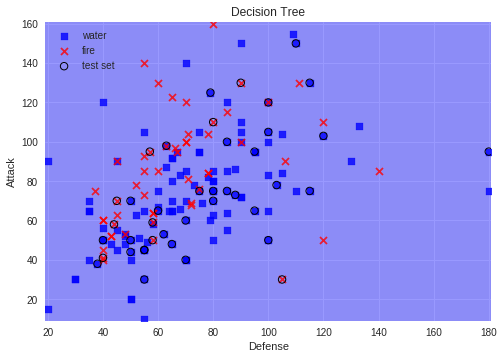

In [13]:
plot_decision_regions(X=x, y=y, classifier=classifier, x_test=x_test)
plt.title('Decision Tree')
plt.xlabel('Defense')
plt.ylabel('Attack')
plt.legend(loc='upper left')
plt.show()